In [1]:
import numpy as np 
import pandas as pd
import os 
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.feature_selection import SelectFromModel

from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt

In [2]:
def param_randomizedtune_pipline(model, X_train, X_test, y_train, y_test, param_grid, plot_flag = True):

    rs_clf = RandomizedSearchCV(model, 
    param_grid, 
    n_iter=10, 
    n_jobs = 8,
    cv = 10,
    scoring='median_absolute_error',
    refit = True, 
    random_state = 10086, verbose = 0)

    rs_clf.fit(X_train, y_train)

    score = rs_clf.best_score_
    param_recommend = rs_clf.best_params_

    train_pred = rs_clf.predict(X_train)
    train_pred = train_pred.reshape(y_train.shape)
    test_pred = rs_clf.predict(X_test)
    test_pred = test_pred.reshape(y_test.shape)

    print('Training Median Absolute Error Ratio %.2f'%(100*np.divide(np.abs(train_pred - y_train),y_train).mean()))
    print('Testing Median Absolute Error Ratio %.2f'%(100*np.divide(np.abs(test_pred - y_test),y_test).mean()))


    if plot_flag:
        fig, ax = plt.subplots(figsize=(8,6), dpi=500)

        ax.scatter(y_train, train_pred, color = 'blue', label = 'Train')
        ax.scatter(y_test, test_pred, color = 'red', label = 'Test')
        plt.xlabel('Actual Ratio')
        plt.ylabel('Predicted Ratio')
        plt.legend()
        font = {'fontname':'Times New Roman', 'size' : 20}

        ax.tick_params(axis="y",direction="in")
        ax.tick_params(axis="x",direction="in")
        # plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], color = 'black', linewidth = 2)
        plt.xlim([0.9,2.4])
        plt.xticks( fontname = 'Times New Roman', fontsize = 18)
        plt.ylim([0.9,2.4])
        plt.yticks(fontname = 'Times New Roman', fontsize = 18)
        plt.xlabel('Actual $CMR_{retrof} / CMR_{exist}$', **font)
        plt.ylabel('Predicted $CMR_{retrof} / CMR_{exist}$', **font)
        plt.locator_params(axis='y', nbins=6)
        plt.locator_params(axis='x', nbins=6)
        plt.legend(frameon = False, prop =  {"family":'Times New Roman', "size":18})
        plt.plot([1,6],[1,6],'--', linewidth = 2, color = 'black')
        sns.despine()

    return rs_clf

In [3]:
param_grid = {'num_feature':[5,10,15,20],
'eta':[0.01,0.015,0.02,0.025,0.05,0.1,0.5,1.0],
'gamma':[0, 0.001,0.01,0.015,0.02,0.025,0.03,0.05,0.1,0.5],
'max_depth':[100,200,300,400,500,600,700,800,1000,2000],
'subsample':[0.1,0.2,0.3,0.4,0.5,0.8,1],
'lambda':[0,0.1,0.2,0.3,0.4,0.5,0.8,1.0],
'alpha':[0,0.1,0.2,0.3,0.4,0.5,0.8,1.0]}

# Retrofitted Building Model

In [3]:
os.chdir(r'C:\Users\User\Desktop\FinalFinalOptimization\XGBoostPipline')
# Read in data
Retrofit_TrainTest_DesignMatrix = pd.read_csv(r'RetrofitDsMedianRatio\RetrofitRatioTrainTestMatrix_Updated.csv')
Retrofit_Edge_DesignMatrix = pd.read_csv(r'RetrofitDsMedianRatio\RetrofitRatioEdgeMatrix.csv')
# Retrofit_Verification_DesignMatrix = pd.read_csv(r'RetrofitDsMedianRatio\RetrofitRatioVerificationMatrix.csv')

Retrofit_TrainTestDSMedian_Ratio = pd.read_csv('RetrofitDsMedianRatio\DSMedianRatio_TrainTest_Updated.csv')
Retrofit_EdgeDSMedian_Ratio = pd.read_csv('RetrofitDsMedianRatio\DSMedianRatio_Edge.csv')
# Retrofit_VerificationDSMedian_Ratio = pd.read_csv('RetrofitDsMedianRatio\DSMedianRatio_Verification.csv')

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(Retrofit_TrainTest_DesignMatrix.append(Retrofit_Verification_DesignMatrix), Retrofit_TrainTestDSMedian_Ratio.append(Retrofit_VerificationDSMedian_Ratio) ,test_size = 0.1)

X_train, X_test, y_train, y_test = train_test_split(Retrofit_TrainTest_DesignMatrix, Retrofit_TrainTestDSMedian_Ratio, test_size = 0.3)

X_train = X_train.append(Retrofit_Edge_DesignMatrix)
y_train = y_train.append(Retrofit_EdgeDSMedian_Ratio)

# reXGB_Complete = param_randomizedtune_pipline(XGBRegressor(), X_train, X_test, y_train.iloc[:,0], y_test.iloc[:,0], param_grid, plot_flag = True)
# reXGB_Complete = reXGB_Complete.best_estimator_

[15:10:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
training mard 1.5426%
testing mard 1.3151%


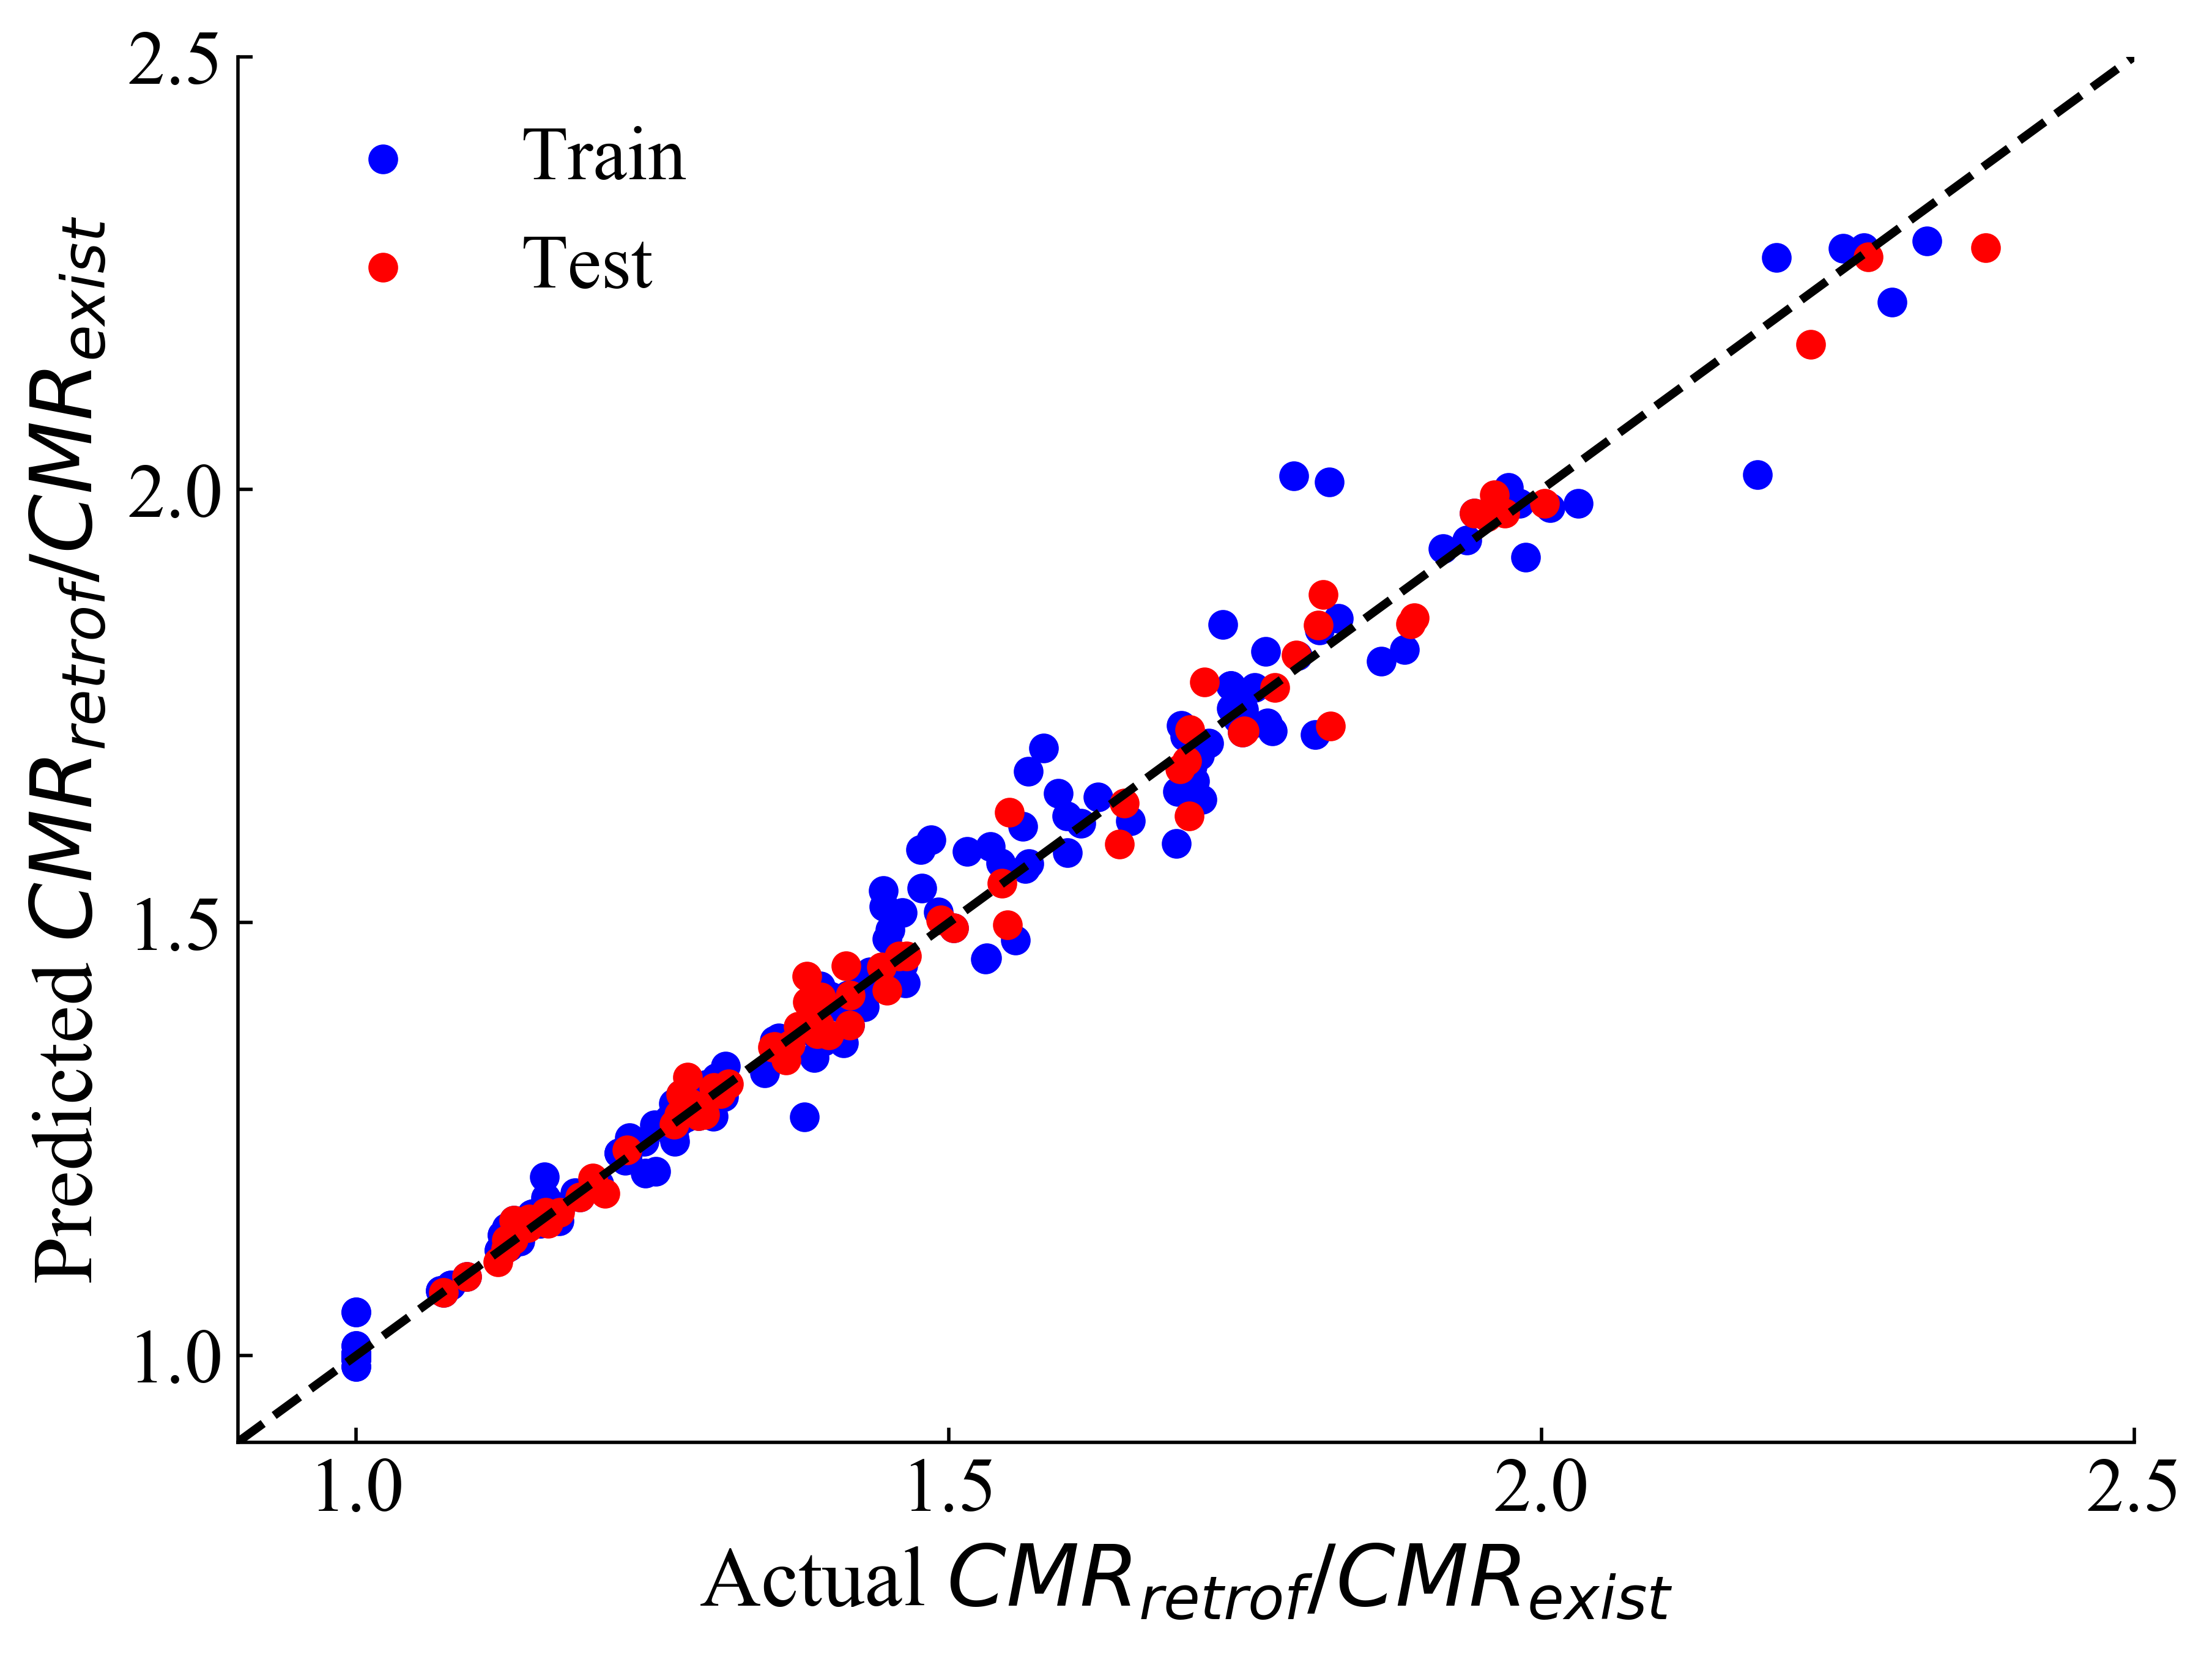

In [32]:
import seaborn as sns
import pickle
os.chdir(r'C:\Users\User\Desktop\FinalFinalOptimization\XGBoostPipline\Models')
reXGB_Complete = pickle.load(open('Retrof_Complete_Ratio.pkl','rb'))

font = {'fontname':'Times New Roman', 'size' : 20}
fig, ax = plt.subplots(figsize=(8,6), dpi=500)
ax.scatter(y_train.iloc[:,0], reXGB_Complete.predict(X_train), color = 'blue', label = 'Train')
ax.scatter(y_test.iloc[:,0], reXGB_Complete.predict(X_test), color = 'red', label = 'Test')
# ax.scatter(Retrofit_VerificationDSMedian_Ratio,reXGB_Complete.predict(Retrofit_Verification_DesignMatrix) , color = 'green', label = 'Actual Ordinance Design')

ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
# plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], color = 'black', linewidth = 2)
plt.xlim([0.9,2.5])
plt.xticks( fontname = 'Times New Roman', fontsize = 18)
plt.ylim([0.9,2.5])
plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='x', nbins=5)
plt.yticks(fontname = 'Times New Roman', fontsize = 18)
plt.xlabel('Actual $CMR_{retrof} / CMR_{exist}$', **font)
plt.ylabel('Predicted $CMR_{retrof} / CMR_{exist}$', **font)
plt.legend(frameon = False, prop =  {"family":'Times New Roman', "size":18})
plt.plot([0.9,6],[0.9,6],'--', linewidth = 2, color = 'black')
sns.despine()

print('training mard %.4f%%'%(np.divide(np.abs(y_train.iloc[:,0]-reXGB_Complete.predict(X_train)), y_train.iloc[:,0]).mean()*100))
print('testing mard %.4f%%'%(np.divide(np.abs(y_test.iloc[:,0]-reXGB_Complete.predict(X_test)), y_test.iloc[:,0]).mean()*100))

0.057903893057096


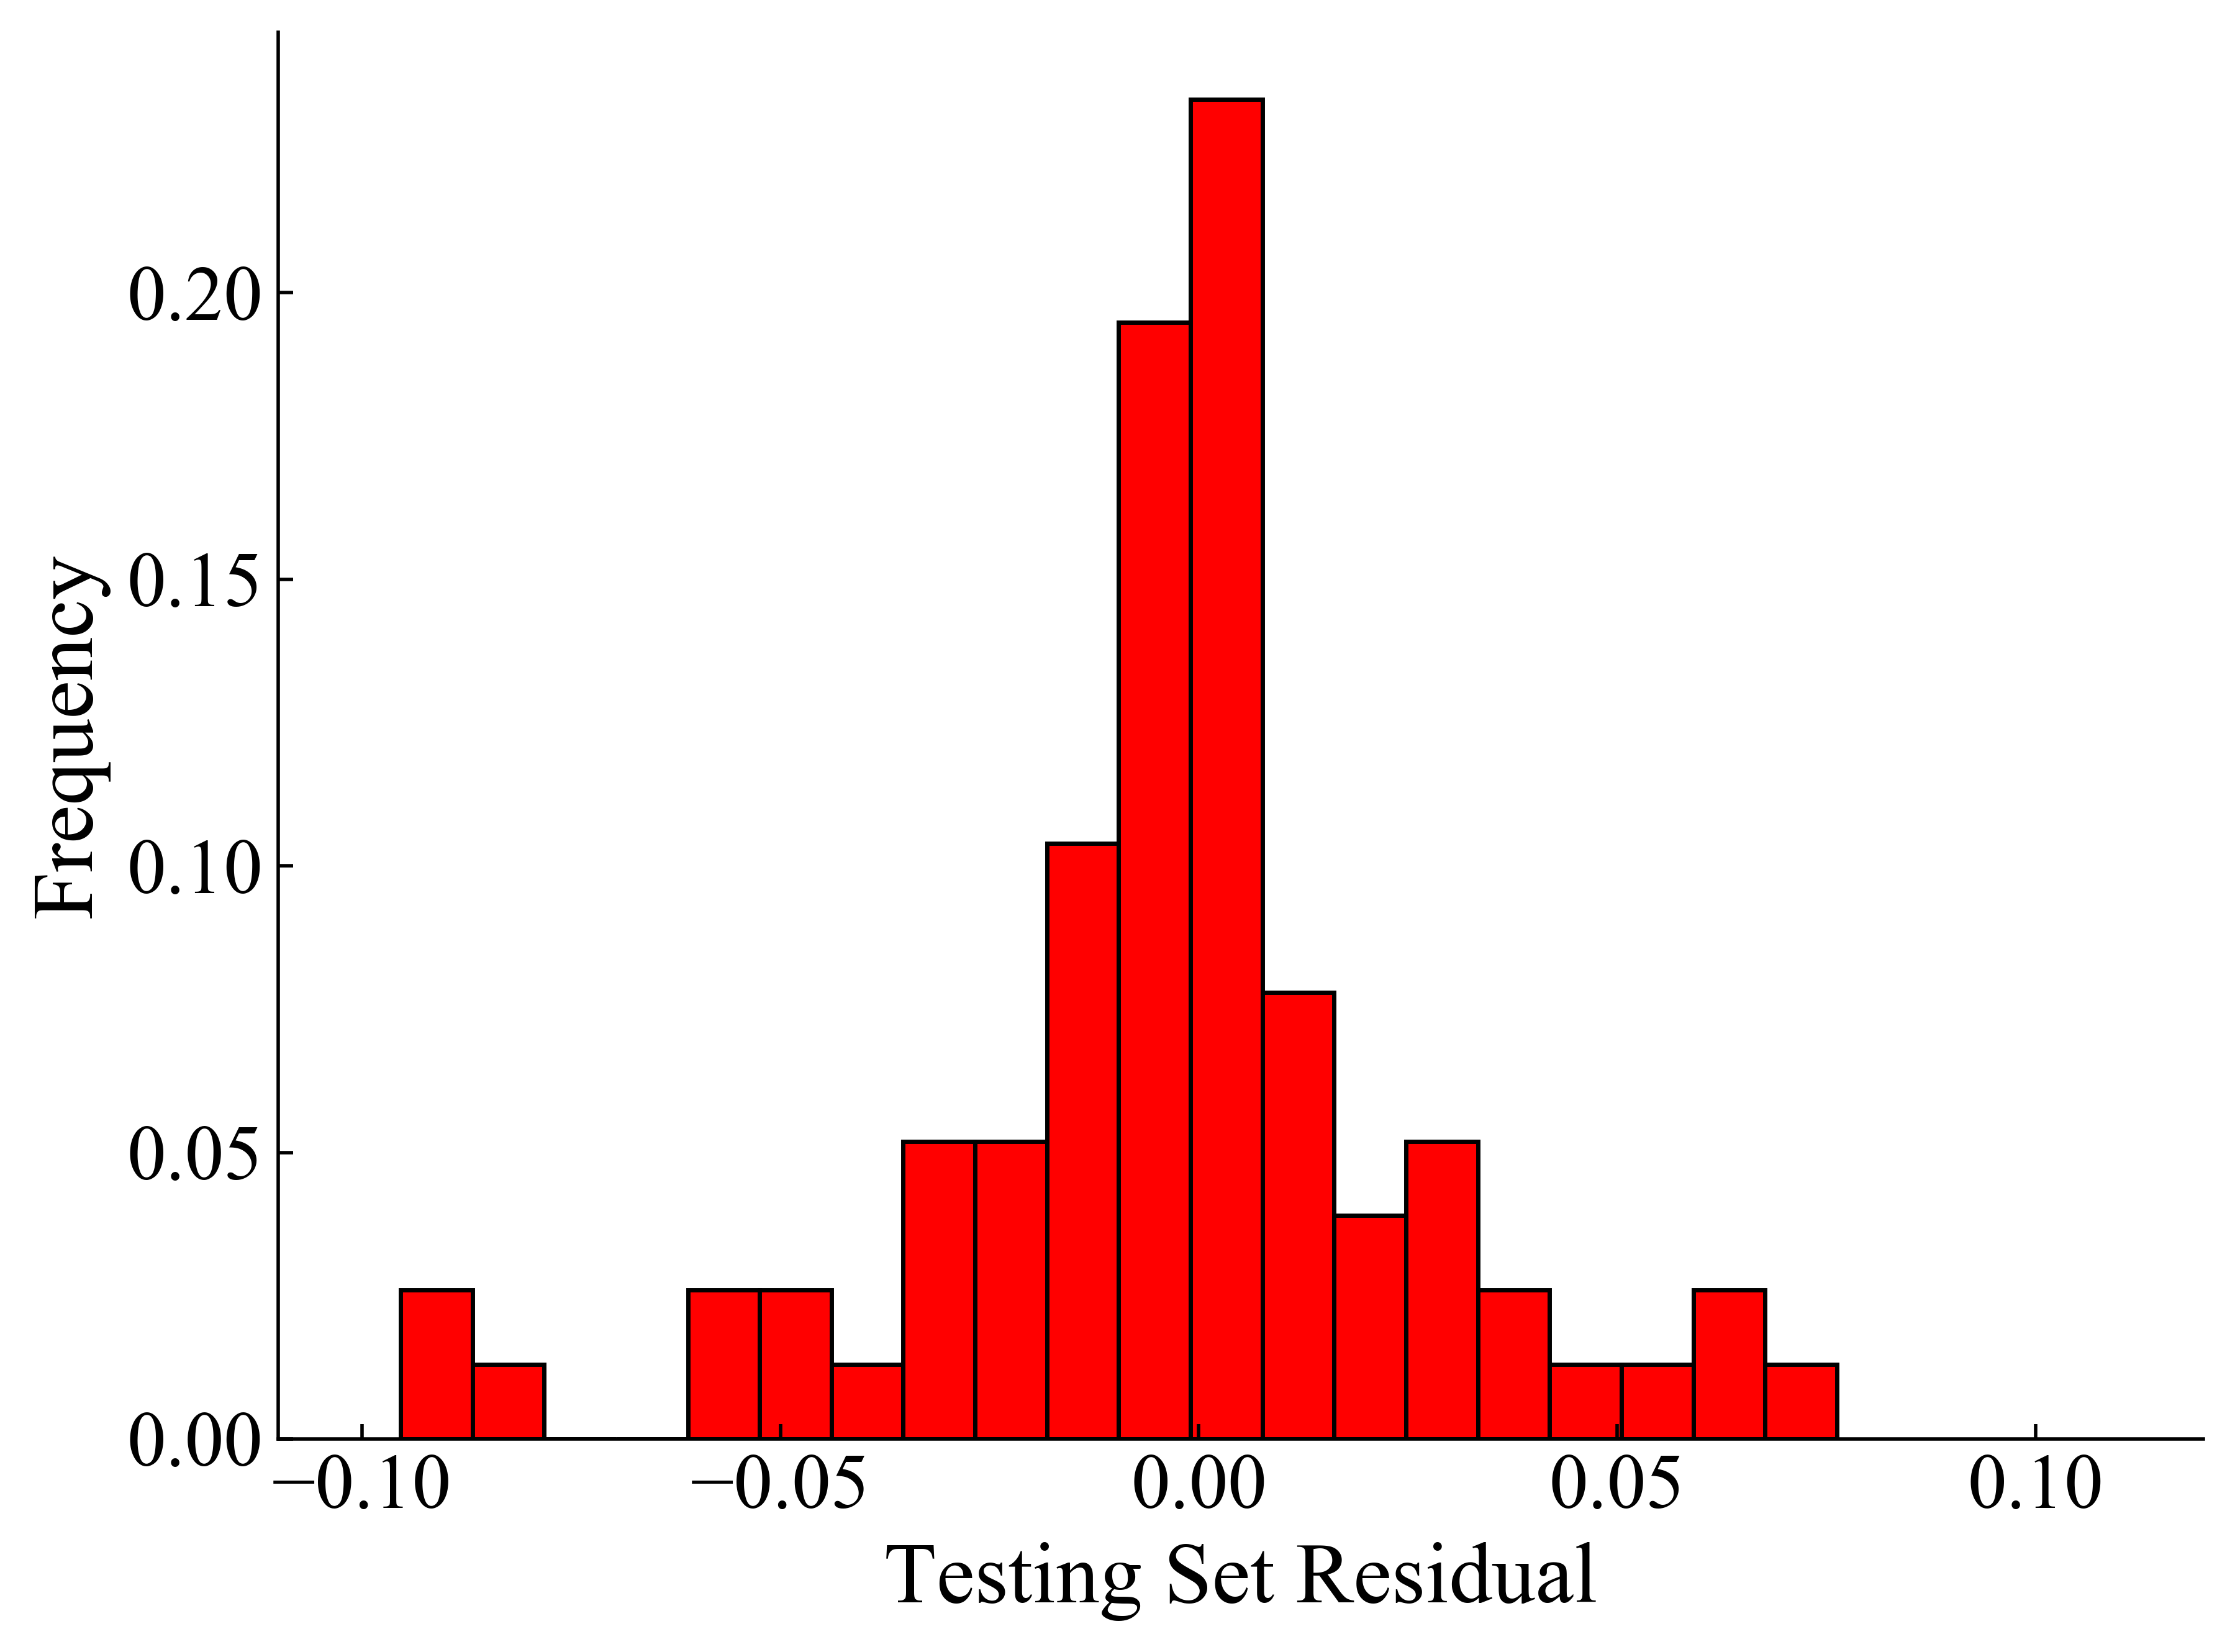

In [34]:
# train_resid = reXGB_Complete.predict(X_train)-y_train.iloc[:,0]
test_resid = reXGB_Complete.predict(X_test) - y_test.iloc[:,0]
print(np.mean(test_resid)+2*np.std(test_resid))
font = {'fontname':'Times New Roman', 'size' : 20}
fig, ax = plt.subplots(figsize=(8,6), dpi=500)
ax.hist(test_resid,bins=20, weights = np.ones_like(test_resid)/float(len(test_resid)), label='Test', color = 'red', edgecolor = 'black')
# ax.hist(train_resid,bins=20, weights = np.ones_like(train_resid)/float(len(train_resid)), label='Train', color='blue' , alpha = 0.4)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.xticks( fontname = 'Times New Roman', fontsize = 18)
plt.yticks(fontname = 'Times New Roman', fontsize = 18)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='y', nbins=6)
plt.xlim([-0.11, 0.12])
plt.xlabel('Testing Set Residual', **font)
plt.ylabel('Frequency', **font)
# plt.legend(frameon = False, prop =  {"family":'Times New Roman', "size":18})
sns.despine()

In [11]:
import pickle
os.chdir(r'C:\Users\User\Desktop\FinalOptimization\XGBoostPipline\Models')
with open('Retrof_Complete_Ratio.pkl', 'wb') as file:
    pickle.dump(reXGB_Complete.best_estimator_, file)